In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import seaborn as sns
import sys
import numpy as np

In [103]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)
set_matplotlib_formats('retina')
pd.options.display.float_format = '{:.3f}'.format

# 에스원, 비트코인 실습

In [3]:
dfs = pd.read_csv('에스원.csv')

In [4]:
dfs['이름'] = '에스원'
cols = ['이름','날짜', '오픈', '고가', '저가', '종가', '거래량', '변동 %']

In [5]:
dfs = dfs[cols]

In [6]:
dates = dfs['날짜']
dates

0       2021년 02월 05일
1       2021년 02월 04일
2       2021년 02월 03일
3       2021년 02월 02일
4       2021년 02월 01일
            ...      
2358    2011년 10월 24일
2359    2011년 10월 21일
2360    2011년 10월 20일
2361    2011년 10월 19일
2362    2011년 10월 18일
Name: 날짜, Length: 2363, dtype: object

In [7]:
dates = dates.str.replace('년','-')
dates = dates.str.replace('월','-')
dates = dates.str.replace('일','-')

In [8]:
dates = pd.to_datetime(dates)

In [9]:
dfs['날짜'] = dates

In [10]:
dfs = dfs.set_index('날짜')

In [11]:
dfs.replace(',','', regex=True, inplace=True)

In [12]:
dfs['거래량'] = dfs['거래량'].str.replace('K','').str.replace('-','')

In [13]:
dfs['거래량']

날짜
2021-02-05    42.76
2021-02-04    53.45
2021-02-03    49.34
2021-02-02    68.14
2021-02-01    63.66
              ...  
2011-10-24    79.35
2011-10-21    72.07
2011-10-20    93.31
2011-10-19    61.45
2011-10-18    65.71
Name: 거래량, Length: 2363, dtype: object

In [14]:
dfs['거래량'] = pd.to_numeric(dfs['거래량'])

In [15]:
dfs['거래량'] = dfs['거래량'] * 1000

In [16]:
dfs[['오픈','고가','저가','종가']] = dfs[['오픈','고가','저가','종가']].astype(int)

In [17]:
dfs['변동 %'] = dfs['변동 %'].str.replace('%','').astype(float) / 100

In [18]:
dfs.dtypes

이름       object
오픈        int32
고가        int32
저가        int32
종가        int32
거래량     float64
변동 %    float64
dtype: object

## 에스원 

In [19]:
dfs

,이름,오픈,고가,저가,종가,거래량,변동 %
날짜,,,,,,,
2021-02-05,에스원,82500,83600,82300,83500,42760.00,0.01
2021-02-04,에스원,83500,83800,81800,82300,53450.00,-0.01
2021-02-03,에스원,83800,85000,83000,83300,49340.00,-0.02
2021-02-02,에스원,81900,84700,81600,84700,68140.00,0.02
2021-02-01,에스원,81000,83900,80800,83300,63660.00,0.03
...,...,...,...,...,...,...,...
2011-10-24,에스원,52800,55000,52800,55000,79350.00,0.05
2011-10-21,에스원,53000,53400,52300,52600,72070.00,0.00
2011-10-20,에스원,54500,54700,52000,52600,93310.00,-0.03


In [20]:
dfsy = dfs.resample('Y').mean()

In [21]:
dfsm = dfs.resample('M', kind = 'period').mean()

In [22]:
dfsq = dfs.resample('Q-DEC').mean()

<AxesSubplot:xlabel='날짜'>

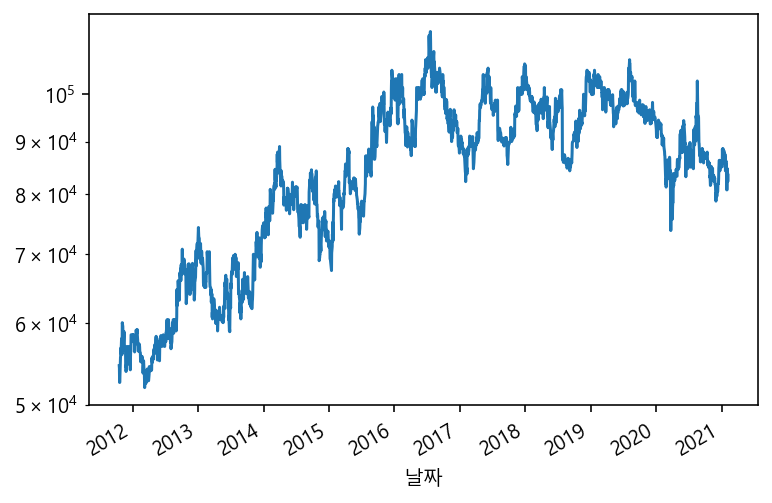

In [23]:
dfs.종가.plot(logy=True)

In [293]:
dfs = dfs.sort_index()

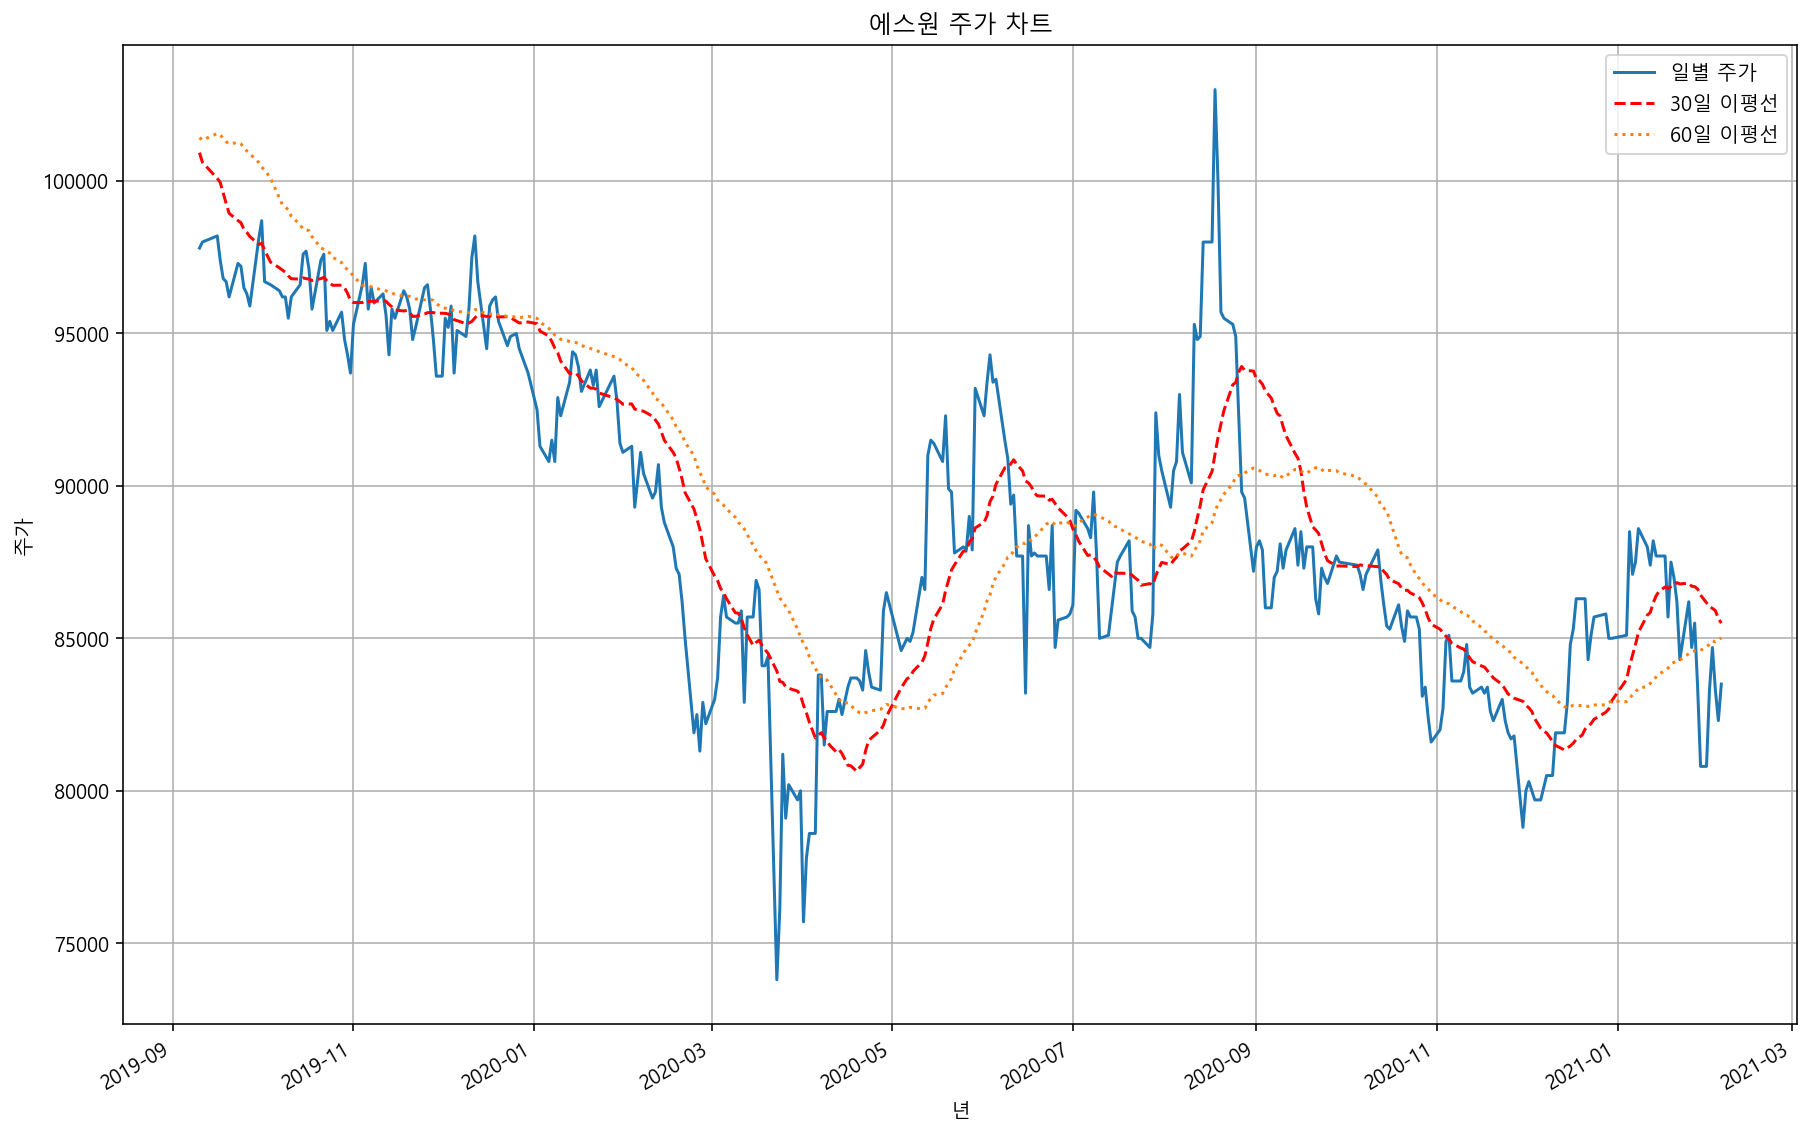

In [294]:
dfs.종가[2000:].plot()
dfs.종가.rolling('30D').mean()[2000:].plot(style='--', color = 'red')
dfs.종가.rolling('60D').mean()[2000:].plot(figsize=(15,10), title = '에스원 주가 차트', ylabel ='주가', xlabel='년',style=':')
plt.legend(labels = ['일별 주가','30일 이평선','60일 이평선'])
plt.grid()
plt.savefig('에스원 주가 차트.png')

In [305]:
dfs_price = dfs['종가']

In [306]:
dfs_price = pd.to_numeric(dfs_price)

In [307]:
dfs_price.dtypes

dtype('int32')

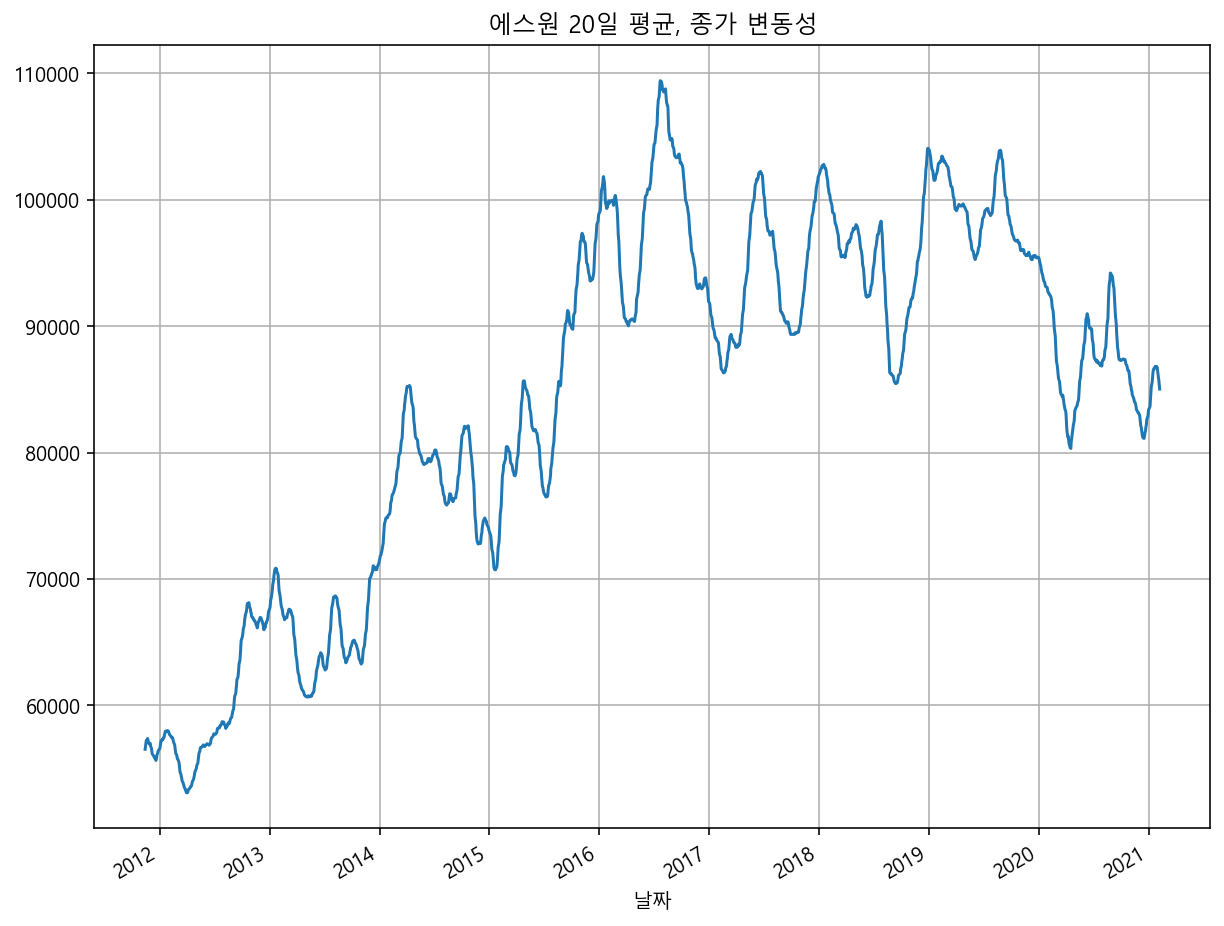

In [315]:
dfs_price.rolling(20).mean().plot(title = '에스원 20일 평균, 종가 변동성', figsize=(10,8))
plt.grid()
plt.savefig('에스원 20일 평균, 종가 변동성.png')

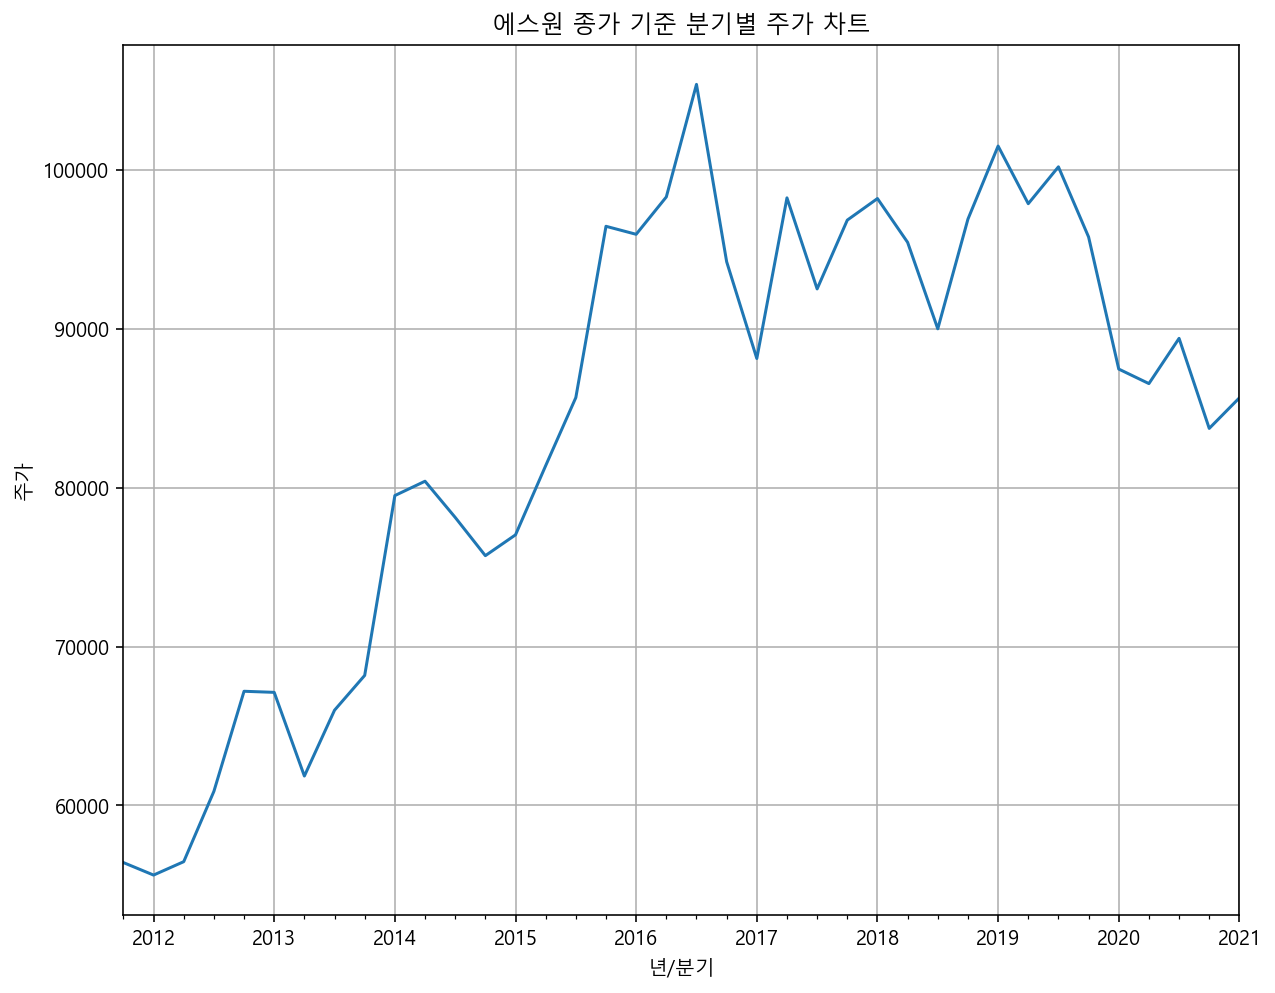

In [26]:
dfsq.종가.plot(figsize=(10,8), title = '에스원 종가 기준 분기별 주가 차트', ylabel ='주가', xlabel='년/분기')
plt.grid()
plt.savefig('에스원 종가 기준, 분기별 주가 차트.png')

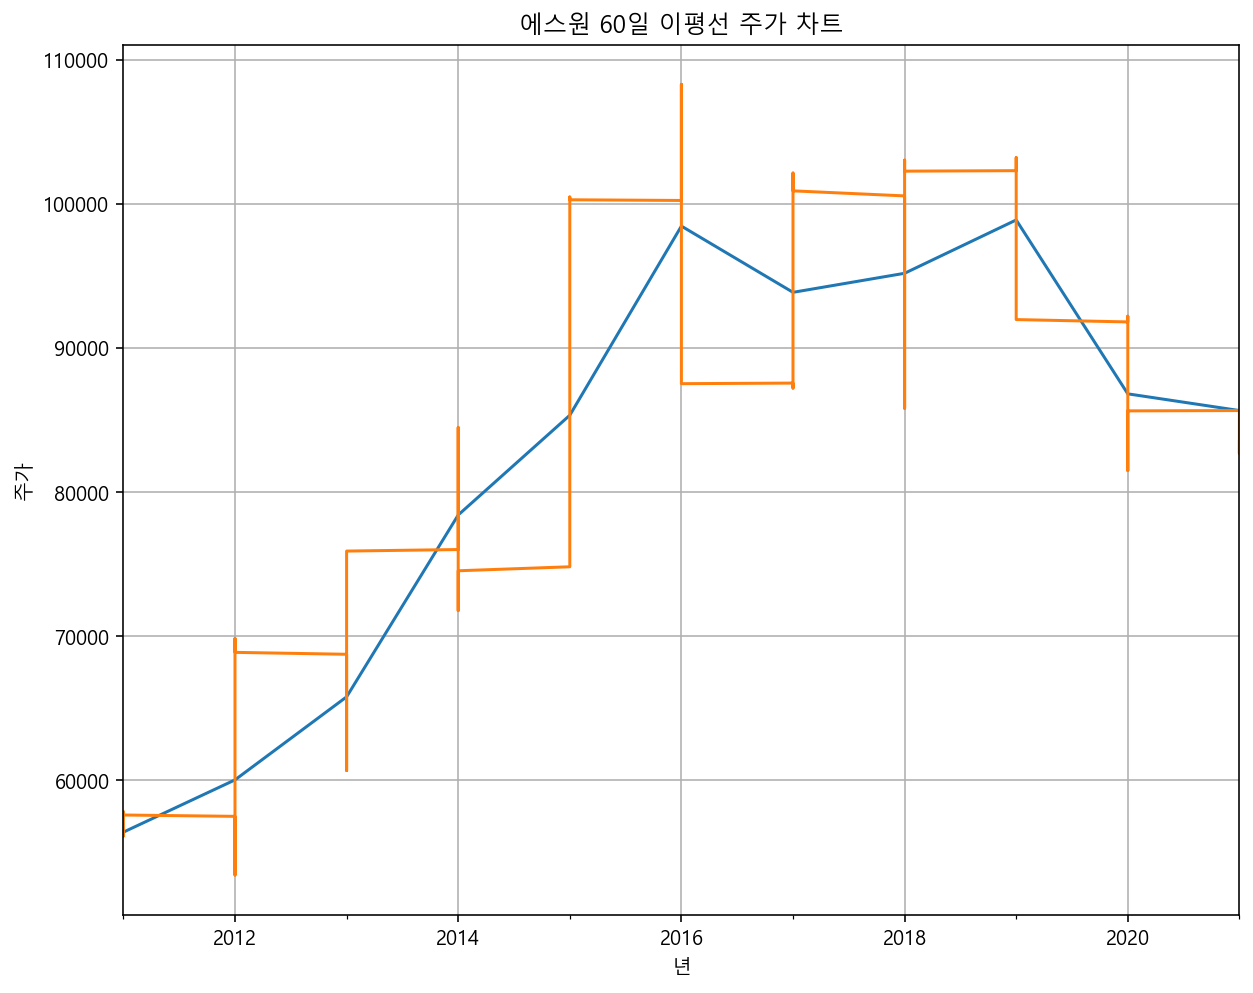

In [27]:
dfsy.종가.plot(title = '에스원 종가 기준 연도별 주가 차트', ylabel ='주가', xlabel='년')
dfs.종가.rolling(30, min_periods =1).mean().plot(figsize=(10,8), title = '에스원 60일 이평선 주가 차트', ylabel ='주가', xlabel='년')
plt.grid()

In [28]:
dfs_end = dfs['종가']

<AxesSubplot:xlabel='날짜'>

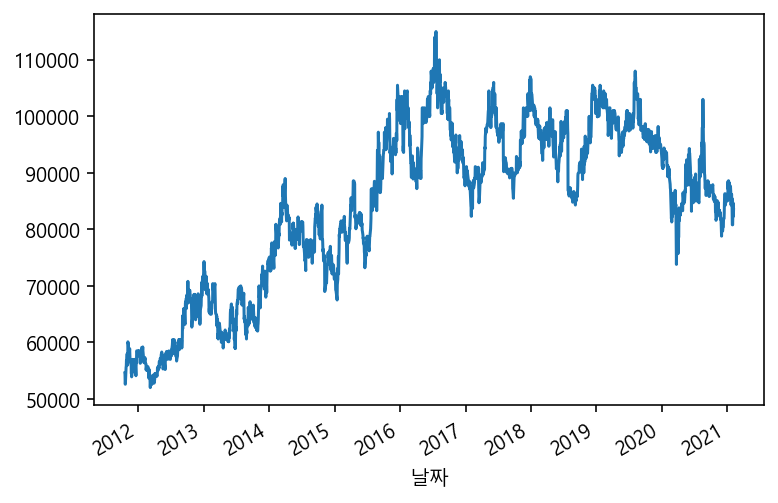

In [29]:
dfs_end.plot()

In [30]:
dfs_end = dfs_end.sort_index()

## 비트코인

In [236]:
dfb = pd.read_csv('비트코인.csv')

In [237]:
dfb['이름'] = '비트코인'
cols = ['이름','날짜', '오픈', '고가', '저가', '종가', '거래량', '변동 %']
dfb = dfb[cols]
dfb['환율'] = 1123.5
dates = dfb['날짜']
dates = dates.str.replace('년','-')
dates = dates.str.replace('월','-')
dates = dates.str.replace('일','-')
dates = pd.to_datetime(dates)
dfb['날짜'] = dates
dfb = dfb.set_index('날짜')
dfb.거래량 = dfb.거래량.str.replace('K','').str.replace('-','0')
dfb['변동 %'] = dfb['변동 %'].str.replace('%','')
dfb.replace(',','', regex=True, inplace=True)
dfb.iloc[:,1:] = dfb.iloc[:,1:].astype(float)
dfb = dfb.sort_index()


In [238]:
dfb['변동 %'] = dfb['변동 %'] / 100
dfb['거래량'] = dfb['거래량'] * 1000
dfb.iloc[:,1:-3] = dfb.iloc[:,1:-3]*1120

In [239]:
dfb.iloc[:,1:-2] = dfb.iloc[:,1:-2].astype(int)

In [240]:
dfb = dfb.rename(columns = {'변동 %':'변동율'})

In [241]:
dfb_price = dfb['종가']
dfb['종가 % change'] = dfb_price.pct_change()

window = 20

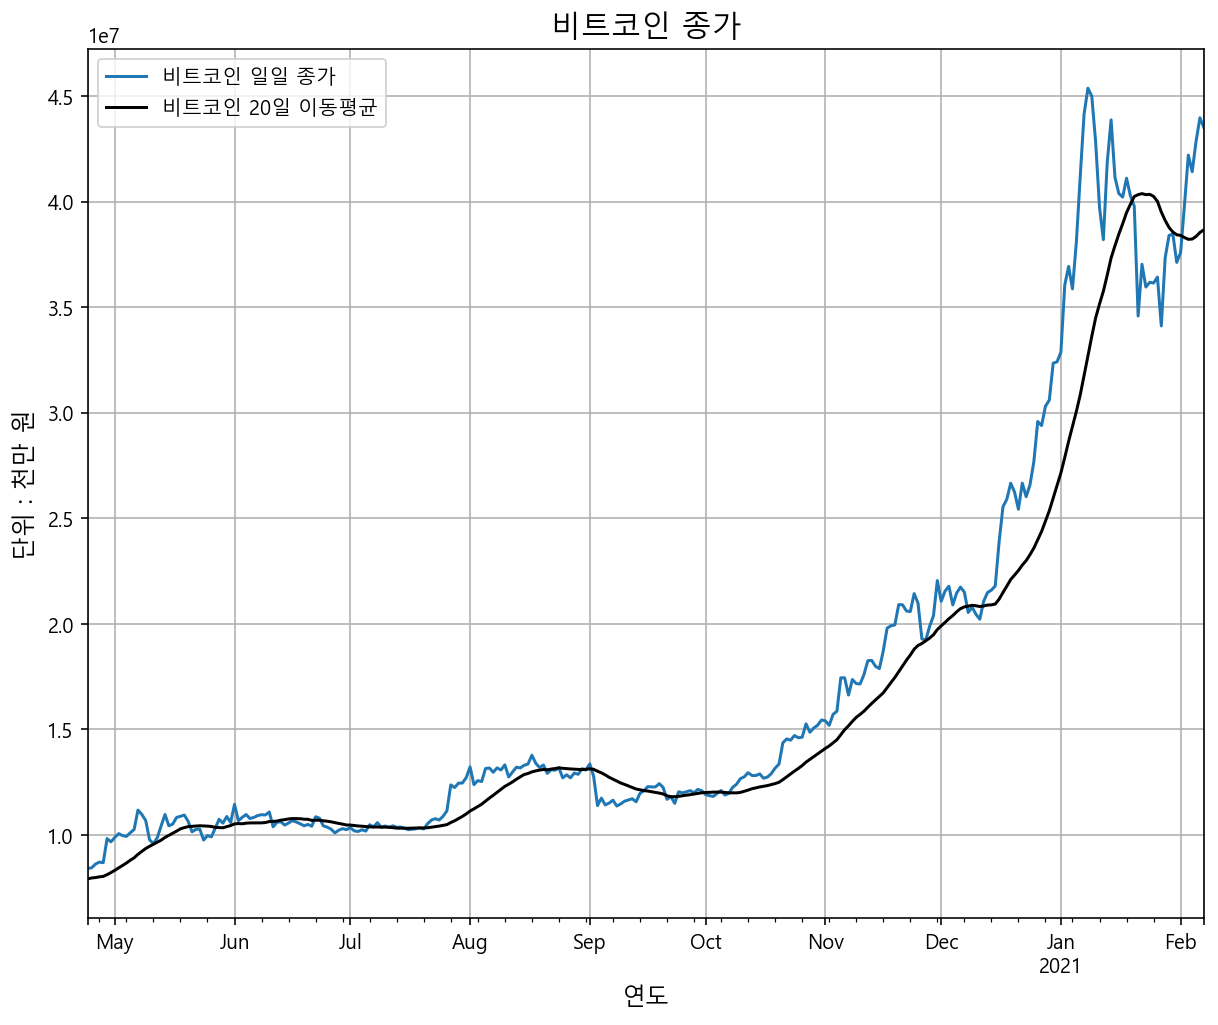

In [316]:
dfb_price[3000:].plot(label = '비트코인 일일 종가')
dfb_price.rolling(window, min_periods = 10).mean()[3000:].plot(figsize=(10,8),
                                      style = 'k-', label = f'비트코인 {window}일 이동평균', fontsize = 10)

plt.title('비트코인 종가', fontsize = 15)
plt.xlabel('연도', fontsize = 12)
plt.ylabel('단위 : 천만 원', fontsize = 12)
plt.grid()
plt.legend()
plt.savefig('비트코인 종가.png')

In [245]:
dfb_log = np.log(dfb_price)

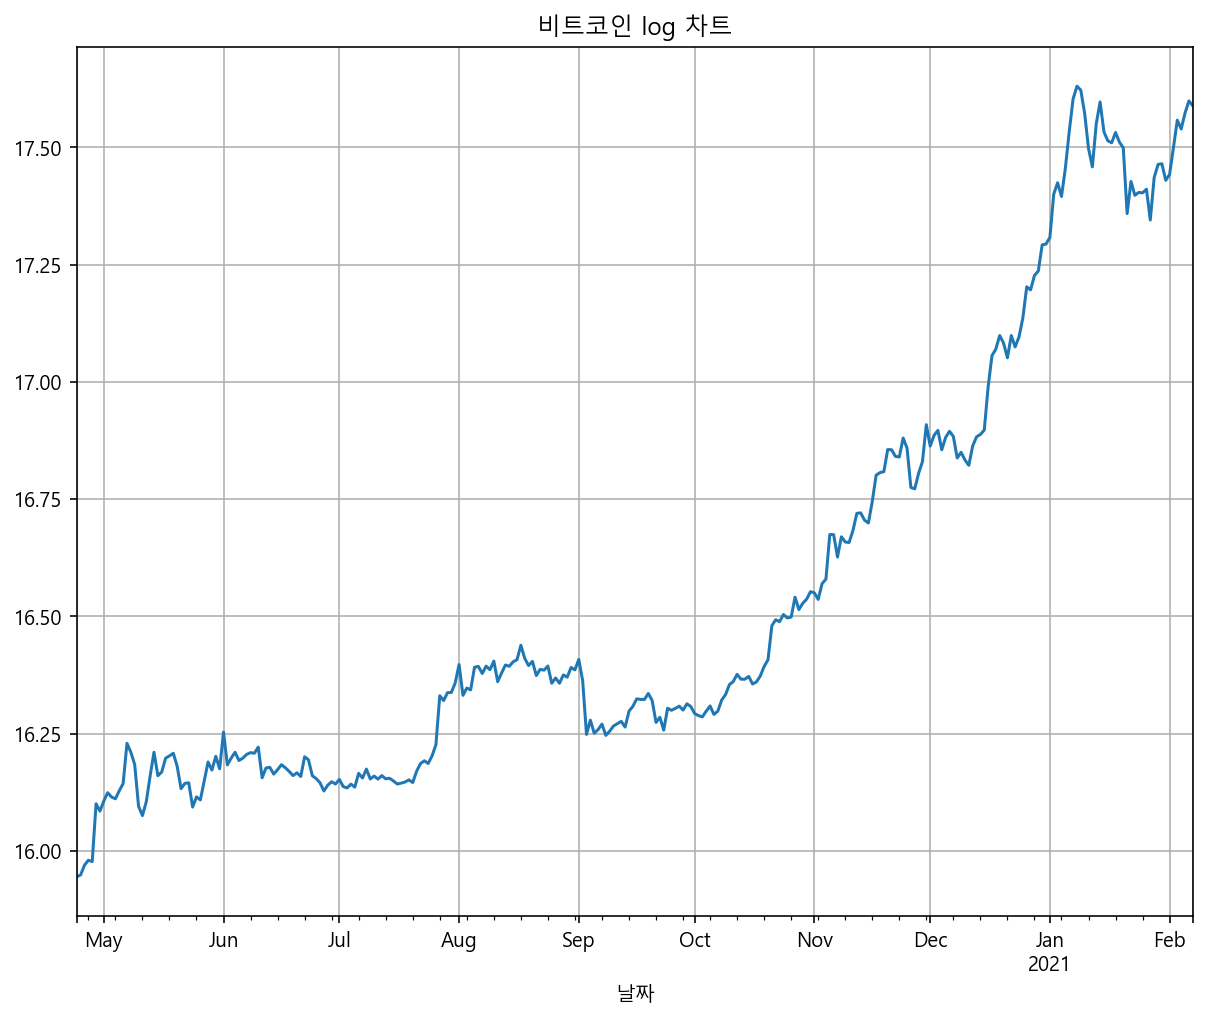

In [318]:
dfb_log[3000:].plot(figsize = (10,8), title = '비트코인 log 차트')
plt.grid()
plt.savefig('비트코인 log 차트.png')

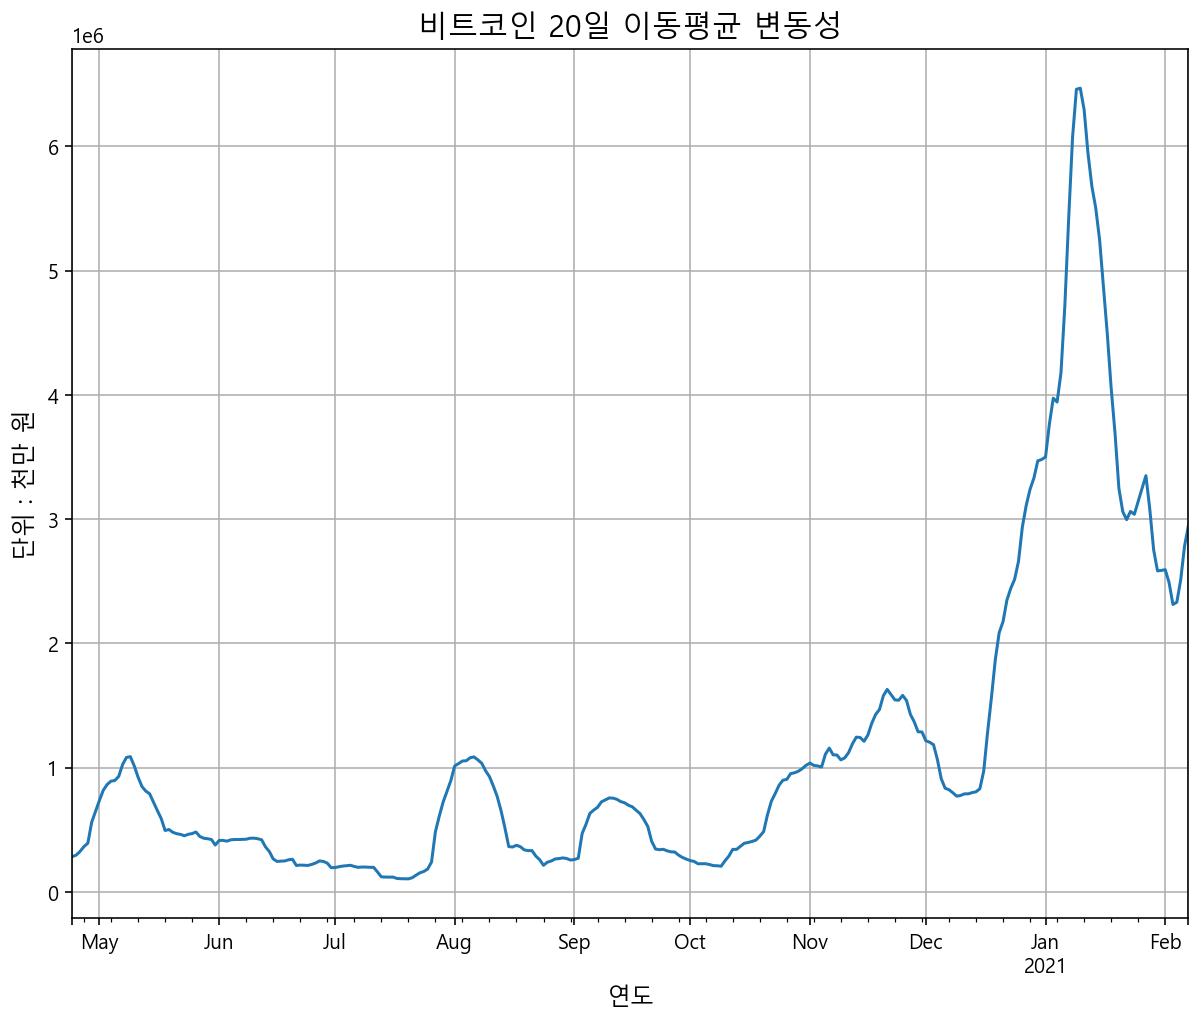

In [319]:
dfb_price.rolling(window).std()[3000:].plot(figsize=(10,8),
                                      style = '-',fontsize = 10)

plt.title(f'비트코인 {window}일 이동평균 변동성', fontsize = 15)
plt.xlabel('연도', fontsize = 12)
plt.ylabel('단위 : 천만 원', fontsize = 12)
plt.grid()
plt.savefig('비트코인 20일 이평 변동성.png')

# 오늘의 코드 rolling 실습

In [33]:
dfs_end

날짜
2011-10-18    54600
2011-10-19    54300
2011-10-20    52600
2011-10-21    52600
2011-10-24    55000
              ...  
2021-02-01    83300
2021-02-02    84700
2021-02-03    83300
2021-02-04    82300
2021-02-05    83500
Name: 종가, Length: 2363, dtype: int32

<AxesSubplot:xlabel='날짜'>

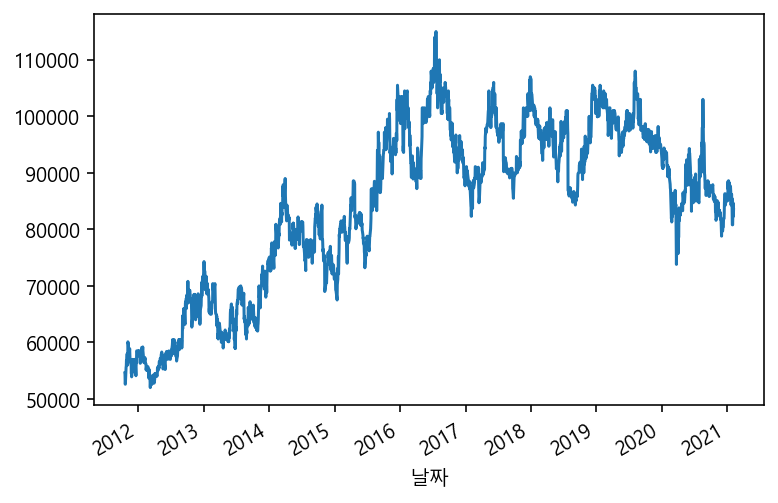

In [34]:
dfs_end.plot()

In [35]:
r = dfs_end.rolling(window = 60)
r.mean()

날짜
2011-10-18        nan
2011-10-19        nan
2011-10-20        nan
2011-10-21        nan
2011-10-24        nan
               ...   
2021-02-01   84043.33
2021-02-02   84041.67
2021-02-03   84040.00
2021-02-04   84025.00
2021-02-05   84026.67
Name: 종가, Length: 2363, dtype: float64

<AxesSubplot:xlabel='날짜'>

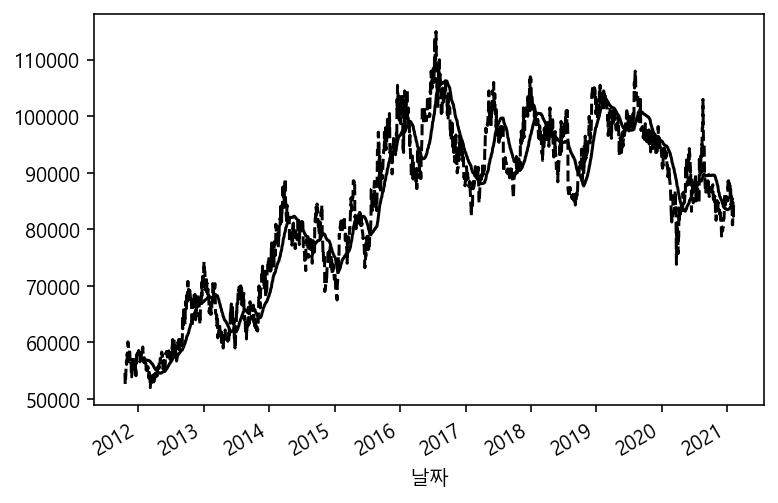

In [36]:
# 이동평균
dfs_end.plot(style='k--')
r.mean().plot(style='k')

## expanding


In [37]:
cols = list('abcd')
dfr = pd.DataFrame(np.random.randn(1000,4),
            index = pd.date_range('2018-01-01', periods = 1000),
            columns = cols)

In [38]:
dfr = dfr.cumsum()
dfr

,a,b,c,d
2018-01-01,-0.75,0.31,-2.39,1.37
2018-01-02,1.09,0.58,-3.21,-0.74
2018-01-03,1.30,2.01,-4.68,-2.36
2018-01-04,-0.40,2.24,-3.25,-0.32
2018-01-05,-0.31,2.13,-2.69,1.38
...,...,...,...,...
2020-09-22,46.88,-52.45,-17.58,-30.89
2020-09-23,47.81,-52.77,-17.61,-30.10
2020-09-24,48.11,-52.51,-17.05,-30.80
2020-09-25,46.56,-53.70,-16.86,-30.27


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

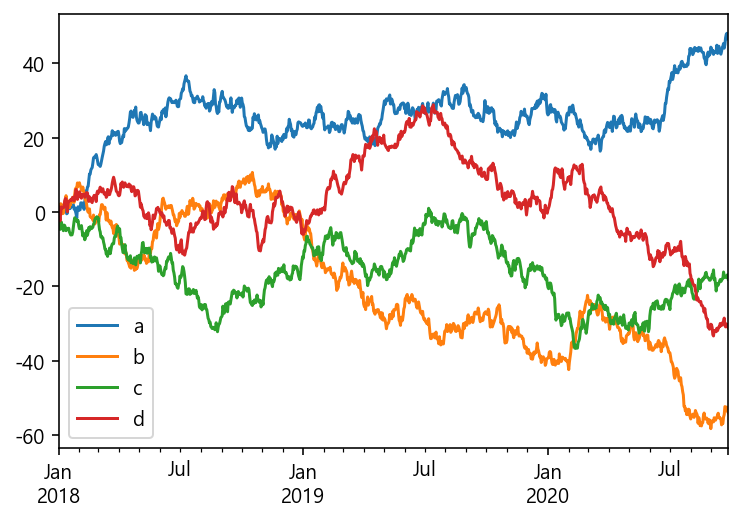

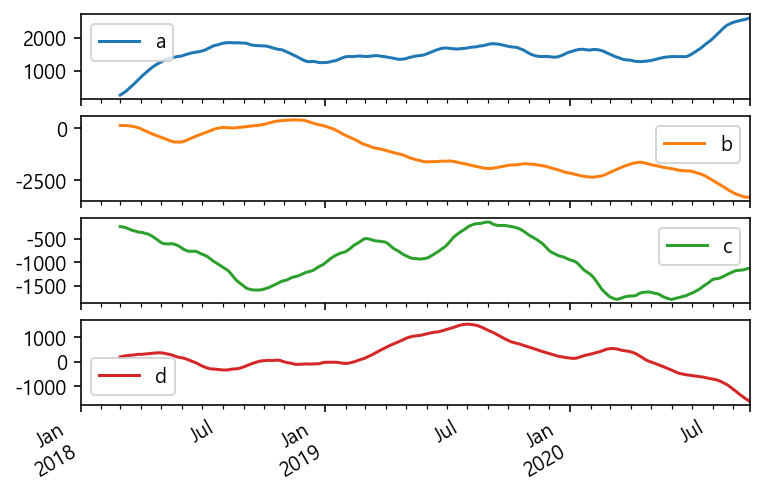

In [39]:
dfr.plot()
dfr.rolling(window=60).sum().plot(subplots=True)

<AxesSubplot:>

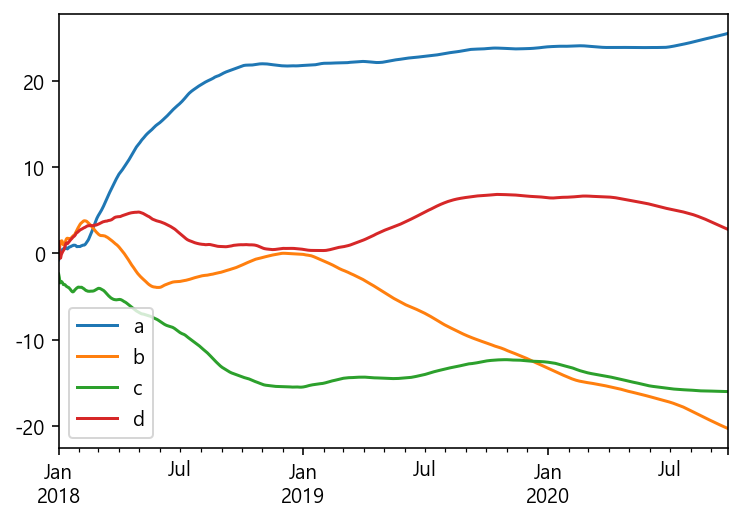

In [40]:
dfr.rolling(window=len(dfr), min_periods=1).mean().plot()

<AxesSubplot:>

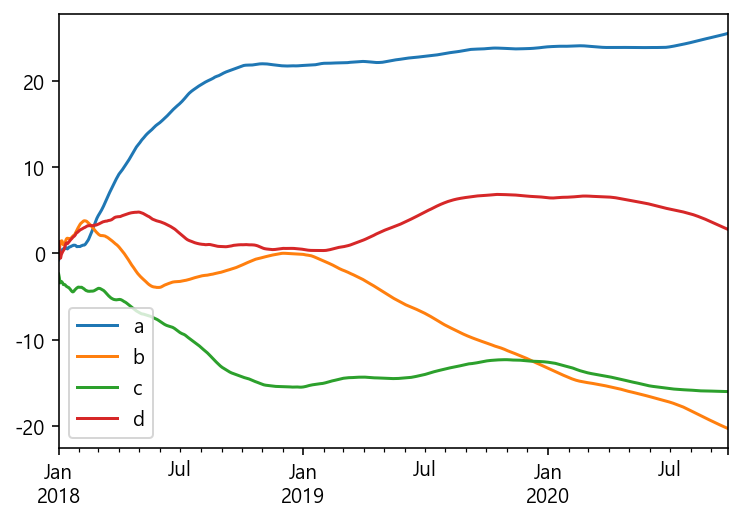

In [41]:
dfr.expanding(min_periods=1).mean().plot()

<AxesSubplot:>

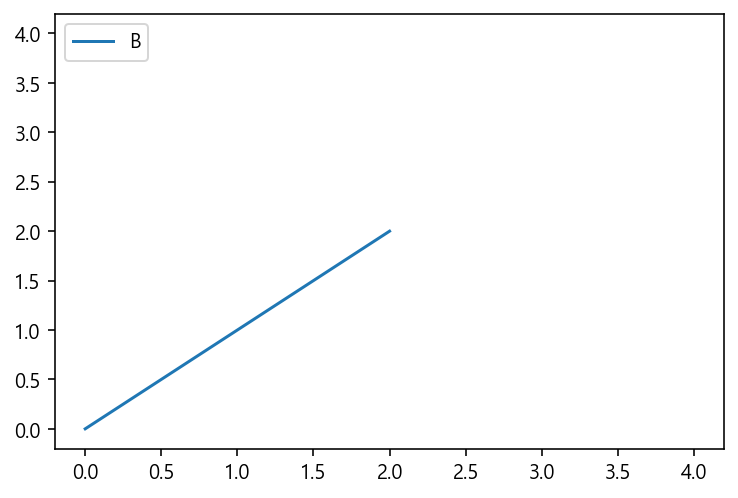

In [42]:
df = pd.DataFrame({"B": [0, 1, 2, np.nan, 4]})
df.plot()

<AxesSubplot:>

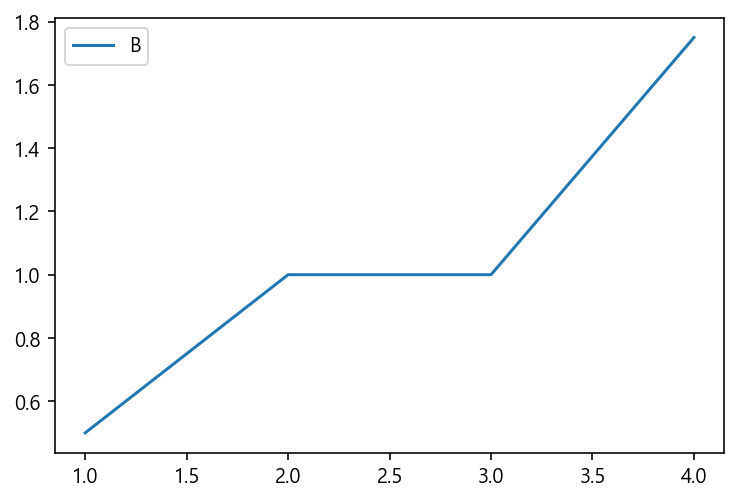

In [43]:
df.expanding(2).mean().plot()